# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [229]:
import pandas as pd

In [3]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [5]:
df['route'].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [11]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [13]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [15]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [17]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [20]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [22]:
#import seaborn as sns

# sns.pairplot(df, hue ='booking_complete' )

### Training a Random Forest Model

In [25]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [27]:
# Columns to one-hot encode (nominal)
onehot_cols = ['sales_channel', 'trip_type', 'route', 'booking_origin']

# Apply one-hot encoding for nominal columns
df = pd.get_dummies(df, columns=onehot_cols)


In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop('booking_complete', axis = 1)
y = df['booking_complete']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(n_estimators=200)

In [39]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [41]:
rfc_pred = rfc.predict(X_test)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[12490   239]
 [ 1987   284]]


              precision    recall  f1-score   support

           0       0.86      0.98      0.92     12729
           1       0.54      0.13      0.20      2271

    accuracy                           0.85     15000
   macro avg       0.70      0.55      0.56     15000
weighted avg       0.81      0.85      0.81     15000



In [ ]:
#!pip install shap

In [51]:
impt = rfc.feature_importances_
impt

array([4.86988187e-02, 1.54659005e-01, 1.14901108e-01, 1.26188173e-01,
       8.87626269e-02, 1.75357134e-02, 1.84911012e-02, 2.19761253e-02,
       3.46930756e-02, 5.31316225e-03, 5.30016549e-03, 1.65523804e-04,
       6.01928777e-04, 7.56407883e-04, 1.54558885e-05, 1.55766317e-06,
       1.58152497e-06, 8.72160005e-05, 1.24194232e-05, 1.05138892e-05,
       4.02955825e-03, 6.49939139e-06, 9.60562198e-05, 1.04392405e-04,
       9.46049471e-05, 4.68170089e-04, 1.45104445e-04, 1.26997293e-04,
       5.11905230e-04, 8.62484443e-05, 9.48944909e-05, 6.02293892e-07,
       3.24410185e-07, 0.00000000e+00, 1.10051355e-04, 2.02540113e-06,
       2.06953524e-05, 1.57922853e-04, 6.03329081e-04, 4.55029945e-05,
       7.99516229e-04, 4.54187951e-04, 7.21619647e-06, 7.42771754e-05,
       2.40372495e-04, 1.04569168e-04, 4.60473548e-04, 2.84551929e-04,
       1.74161304e-04, 5.78836719e-06, 1.25170693e-05, 2.44450156e-05,
       5.24619920e-04, 4.84701662e-04, 6.71436224e-05, 1.14561649e-03,
      

In [55]:
b = len(impt)
b

917

In [115]:
columns_list = X.columns.tolist() # Use X as a dataframe here because it doesn't have 'booking_complete' column and we dont need it either here
#print(columns_list)
col_len = len(columns_list)
col_len

917

In [125]:
feature_imp_df = pd.DataFrame({'Feature': columns_list, 'Gini Importance': impt})
sorted_feature_imp_df = feature_imp_df.sort_values(by = 'Gini Importance', ascending=False)

top_20_sorted_feature_imp_df = sorted_feature_imp_df.nlargest(20, 'Gini Importance')
print(top_20_sorted_feature_imp_df)

                        Feature  Gini Importance
1                 purchase_lead         0.154659
3                   flight_hour         0.126188
2                length_of_stay         0.114901
4                    flight_day         0.088763
0                num_passengers         0.048699
8               flight_duration         0.034693
864     booking_origin_Malaysia         0.028420
7         wants_in_flight_meals         0.021976
817    booking_origin_Australia         0.020600
6          wants_preferred_seat         0.018491
5           wants_extra_baggage         0.017536
731                route_PENTPE         0.007277
850    booking_origin_Indonesia         0.005634
9        sales_channel_Internet         0.005313
10         sales_channel_Mobile         0.005300
443                route_ICNPEN         0.004748
898  booking_origin_South Korea         0.004550
20                 route_AKLKUL         0.004030
893    booking_origin_Singapore         0.004016
856        booking_o

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

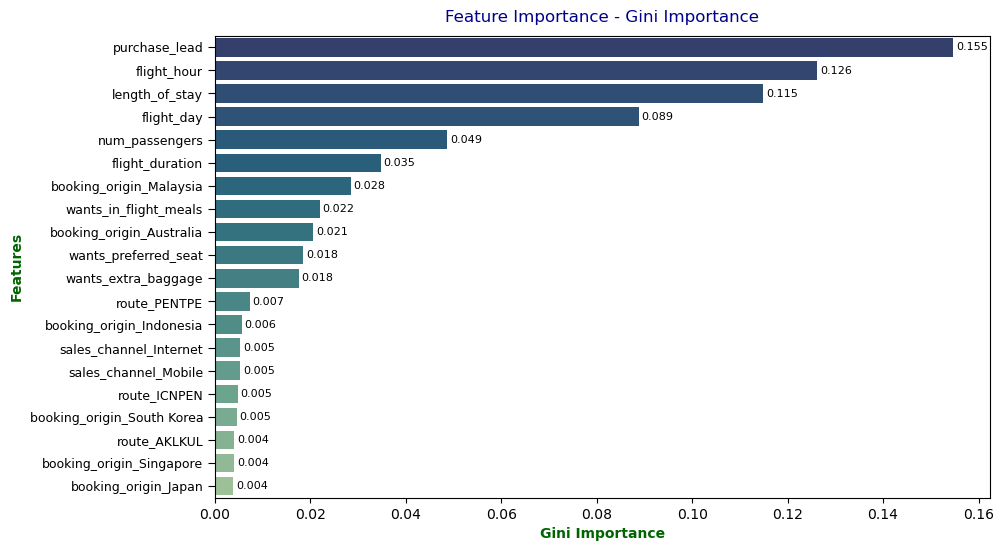

In [227]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data = top_20_sorted_feature_imp_df, x = 'Gini Importance', y = 'Feature', palette='crest_r')
plt.xlabel('Gini Importance', fontsize=10, fontweight='bold', color='darkgreen')
plt.ylabel('Features', fontsize=10, fontweight='bold', color='darkgreen')
plt.title('Feature Importance - Gini Importance', pad = 10, color = 'darkblue')
plt.tick_params(axis='y', which='major', labelsize=9, labelcolor='black', length=5)

# ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[0], 
             labels=[f'{val:.3f}' for val in top_20_sorted_feature_imp_df['Gini Importance']],
             fontsize=8,  # Font size
             color='black',  # Font color
             label_type='edge',  # Label position
             padding=2,  # Padding between bar and label
             rotation=0,  # Label rotation
             # bbox=dict(facecolor='white', edgecolor='none', pad=2)  # Background box for labels
            )
plt.savefig('BA_Feature_Gini-importance.png', bbox_inches='tight', pad_inches=0.1, dpi=400)

plt.show()